In [ ]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

X, y = load_digits(return_X_y=True, as_frame=True)
print('X의 크기:', X.shape)

X의 크기: (1797, 64)


In [ ]:
myfilter = SelectKBest(chi2, k=20)
myfilter.fit(X, y)

cols = myfilter.get_support(indices=True)
X_new = X.iloc[:, cols]
print('필터링을 수행한 후 X의 크기:', X_new.shape)

필터링을 수행한 후 X의 크기: (1797, 20)


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_diabetes
%matplotlib inline

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
y = y - y.mean()

In [ ]:
def soft_threshold(rho, alpha):
    if rho < -alpha:
        return rho + alpha
    elif rho > alpha:
        return rho - alpha
    return 0

def coordinate_descent_lasso(X, y, alpha=.01, num_iters=100):
    n,p = X.shape
    w = np.ones((p, ))
    z = np.zeros((p, ))

    for j in range(p):
        X_j = X[:, j].reshape(-1, 1)
        z[j] = np.inner(X[:, j], X[:, j])/n

    for i in range(num_iters):
        for j in range(p):
            rho = np.inner(X[:, j], y - np.matmul(X, w) + w[j] * X[:, j]) / n
            w[j] = 1 / z[j] * soft_threshold(rho, alpha)

    return w.flatten()

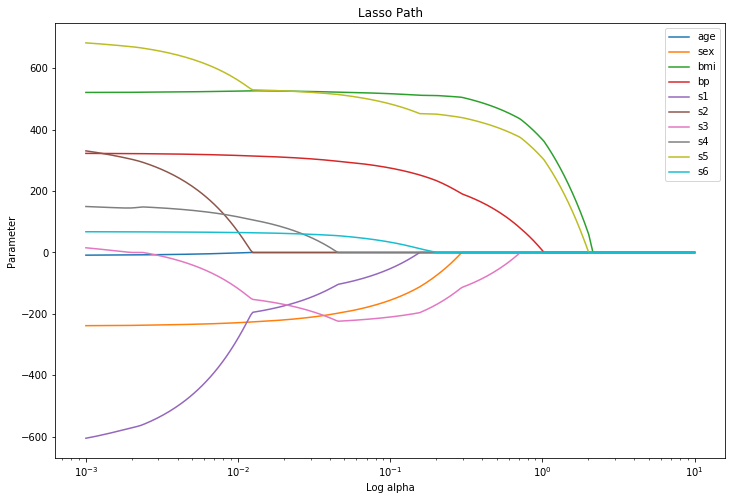

In [ ]:
ws = []
alphas = np.logspace(-3, 1, 300)

for alpha in alphas:
    w = coordinate_descent_lasso(X, y, alpha=alpha, num_iters=100)
    ws.append(w)

w_lasso = np.stack(ws).T

plt.figure(figsize=(12, 8))
for i in range(w_lasso.shape[0]):
    plt.plot(alphas, w_lasso[i], label=diabetes.feature_names[i])

plt.xscale('log')
plt.xlabel('Log alpha')
plt.ylabel('Parameter')
plt.title('Lasso Path')
plt.legend()

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

X_train.head()

age       sex       bmi        bp        s1        s2        s3  \
221 -0.045472 -0.044642 -0.038540 -0.026328 -0.015328  0.000878 -0.032356   
176  0.045341  0.050680  0.019662  0.039087  0.020446  0.025930  0.008142   
227  0.067136  0.050680 -0.029918  0.057449 -0.000193 -0.015719  0.074412   
434  0.016281 -0.044642  0.001339  0.008101  0.005311  0.010899  0.030232   
110  0.041708  0.050680 -0.032073 -0.022885 -0.049727 -0.040144  0.030232   

           s4        s5        s6  
221 -0.002592  0.001144 -0.038357  
176 -0.002592 -0.003304  0.019633  
227 -0.050564 -0.038459  0.007207  
434 -0.039493 -0.045421  0.032059  
110 -0.039493 -0.126097  0.015491

In [ ]:
scaler = StandardScaler()
reg = Lasso(alpha=10, random_state=1234)

pipe = Pipeline(steps=[("scaler", scaler), ("reg", reg)])
pipe = pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_pred = pipe.predict(X_test)

print(f'학습 데이터셋 MAE:{np.abs(y_train_pred - y_train).mean(): .3f}')
print(f'테스트 데이터셋 MAE:{np.abs(y_pred - y_test).mean(): .3f}')

학습 데이터셋 MAE: 47.475
테스트 데이터셋 MAE: 46.139


In [ ]:
print('추정 파라미터의 값:\n', reg.coef_)

추정 파라미터의 값:
 [ 0.         -0.         22.14741042  7.25438995 -0.         -0.
 -4.43633143  0.         18.8046418   0.        ]


In [ ]:
print('re.coef_[0]의 클래스:', type(reg.coef_[0]))
print('re.coef_[1]의 클래스:', type(reg.coef_[1]))
print('re.coef_[0]과 0의 동일 여부:', reg.coef_[0] == 0)
print('re.coef_[1]과 0의 동일 여부:', reg.coef_[1] == 0)

re.coef_[0]의 클래스: <class 'numpy.float64'>
re.coef_[1]의 클래스: <class 'numpy.float64'>
re.coef_[0]과 0의 동일 여부: True
re.coef_[1]과 0의 동일 여부: True


In [ ]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)
X.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641

In [ ]:
import numpy as np
import pandas as pd

rng = np.random.RandomState(1234)
X_random = pd.DataFrame(rng.randn(X.shape[0], 14),
                        columns=[f"random_{i:02d}" for i in range(14)])
X = pd.concat([X, X_random], axis=1)
X.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  ...  random_04  random_05  random_06  \
0 -0.002592  0.019908 -0.017646  ...  -0.720589   0.887163   0.859588   
1 -0.039493 -0.068330 -0.092204  ...   1.321158  -1.546906  -0.202646   
2 -0.002592  0.002864 -0.025930  ...   1.047579   1.045938   0.863717   
3  0.034309  0.022692 -0.009362  ...  -0.136795   0.018289   0.755414   
4 -0.002592 -0.031991 -0.046641  ...  -0.974236  -0.070345   0.307969   

   random_07  random_08  random_09  random_10  random_11  random_12  random_13  
0  -0.636524   0.015696  -2.242685   1.150036   0.991946   0.953324  -2.021255  
1  -0.655969   0.193421   0.553439   1.318152  -0.469305   0.675554  -1.817027  
2  -0.122092   0.124713  -0.322795   0.841675   2.390961   0.076200  -0.566446  
3   0.215269   0.841009  -1.445810  -1.401973  -0.100918  -0.548242  -0.144620  
4  -0.208499   1.033801  -2.400454   2.030604  -1.142631   0.211883   0.704721  

[5 rows x 24 columns]

In [ ]:
import time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
%matplotlib inline

start_time = time.time()
lasso_lars_ic = make_pipeline(StandardScaler(),
                              LassoLarsIC(criterion="aic",
                                          normalize=False)).fit(X, y)
fit_time = time.time() - start_time

In [ ]:
results = pd.DataFrame({
    "alphas": lasso_lars_ic[-1].alphas_,
    "AIC criterion": lasso_lars_ic[-1].criterion_
}).set_index("alphas")
alpha_aic = lasso_lars_ic[-1].alpha_
print(f'alpha_aic:{alpha_aic: .3f}')

alpha_aic: 1.981


In [ ]:
lasso_lars_ic.set_params(lassolarsic__criterion="bic").fit(X, y)
results["BIC criterion"] = lasso_lars_ic[-1].criterion_
alpha_bic = lasso_lars_ic[-1].alpha_
print(f'alpha_bic:{alpha_bic: .3f}')

alpha_bic: 4.516


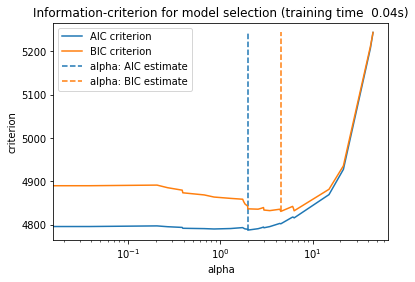

In [ ]:
ax = results.plot()
ax.vlines(alpha_aic,
          results["AIC criterion"].min(),
          results["AIC criterion"].max(),
          label="alpha: AIC estimate",
          linestyles="--",
          color="tab:blue")
ax.vlines(alpha_bic,
          results["BIC criterion"].min(),
          results["BIC criterion"].max(),
          label="alpha: BIC estimate",
          linestyle="--",
          color="tab:orange")
ax.set_xlabel('alpha')
ax.set_ylabel("criterion")
ax.set_xscale("log")
ax.legend()
_ = ax.set_title(f"Information-criterion for model selection (training time {fit_time: .2f}s)")

In [ ]:
from sklearn.linear_model import LassoCV

start_time = time.time()
model = make_pipeline(StandardScaler(), LassoCV(cv=20)).fit(X, y)
fit_time = time.time() - start_time

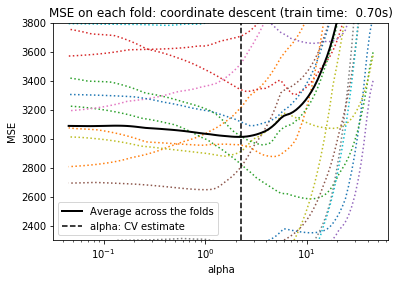

In [ ]:
lasso = model[-1]
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(lasso.alphas_,
         lasso.mse_path_.mean(axis=-1),
         color="black",
         label="Average across the folds",
         linewidth=2)
plt.axvline(lasso.alpha_,
            linestyle="--",
            color="black",
            label="alpha: CV estimate")

plt.ylim(2300, 3800)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
_ = plt.title(f"MSE on each fold: coordinate descent (train time: {fit_time: .2f}s)")

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np

X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

In [ ]:
lassoCV = LassoCV(alphas=[0.01, 0.1, 1, 10, 100], cv=10)
reg = make_pipeline(StandardScaler(), lassoCV).fit(X_train, y_train)
y_pred = reg.predict(X_test)

print('최적의 alpha:', lassoCV.alpha_)
print(f'계수: {lassoCV.coef_}')
print(f'MAE:{(np.abs(y_pred - y_test)).mean(): .3f}')

최적의 alpha: 1.0
계수: [ -0.         -11.51765404  23.99105458  14.40703304  -5.33719989
  -0.          -9.73608914   2.29161593  23.67465157   3.04274953]
MAE: 42.992


In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso

X, y = make_regression(n_samples=300,
                       n_features=400,
                       n_informative=50,
                       n_targets=1,
                       bias=0.0,
                       noise=10.0,
                       random_state=1234)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

In [ ]:
reg1 = LinearRegression()
reg1 = reg1.fit(X_train, y_train)
y_train_pred = reg1.predict(X_train)
print(f'학습 데이터셋 기준 OLS 모델의 MSE:{((y_train - y_train_pred)**2).mean(): .2f}')

y_test_pred = reg1.predict(X_test)
print(f'테스트 데이터셋 기준 OLS 모델의 MSE:{((y_test - y_test_pred)**2).mean(): .2f}')

학습 데이터셋 기준 OLS 모델의 MSE: 0.00
테스트 데이터셋 기준 OLS 모델의 MSE: 66235.35


In [ ]:
reg2 = Lasso()
reg2 = reg2.fit(X_train, y_train)
y_train_pred = reg2.predict(X_train)
print(f'학습 데이터셋 기준 LASSO 모델의 MSE:{((y_train - y_train_pred)**2).mean(): .2f}')

y_test_pred = reg2.predict(X_test)
print(f'테스트 데이터셋 기준 LASSO 모델의 MSE:{((y_test - y_test_pred)**2).mean(): .2f}')

학습 데이터셋 기준 LASSO 모델의 MSE: 130.41
테스트 데이터셋 기준 LASSO 모델의 MSE: 457.40
